In [7]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
adidas_path = '../Resources/Round 4 Year_Adidas_Sales_Data_Monthly_Category_Summary.csv'
adidas_df = pd.read_csv(adidas_path,
                          index_col='Invoice Date',
                          parse_dates=True,
                          date_format="dateutil")

In [9]:
display(adidas_df.head())
display(adidas_df.tail())
      


,Year,Month_Number,Month_Name,Region,State,City,Category,Subcategory,Product,Price per Unit,Units Sold,Total Sales,Profit per Unit,Operating Margin,Total Operating Profit,Year-Month
Invoice Date,,,,,,,,,,,,,,,,
2020-01-01,2020,1,Jan,Northeast,New York,New York,Street Footwear,Men's,Men's Street Footwear,50.0,1200,60000,25.00,0.50,30000.0,2020-01
2020-01-02,2020,1,Jan,Northeast,New York,New York,Athletic Footwear,Men's,Men's Athletic Footwear,50.0,1000,50000,15.00,0.30,15000.0,2020-01
2020-01-03,2020,1,Jan,Northeast,New York,New York,Street Footwear,Women's,Women's Street Footwear,40.0,1000,40000,14.00,0.35,14000.0,2020-01
2020-01-04,2020,1,Jan,Northeast,New York,New York,Athletic Footwear,Women's,Women's Athletic Footwear,45.0,850,38250,15.75,0.35,13387.5,2020-01
2020-01-05,2020,1,Jan,Northeast,New York,New York,Apparel,Men's,Men's Apparel,60.0,900,54000,18.00,0.30,16200.0,2020-01


,Year,Month_Number,Month_Name,Region,State,City,Category,Subcategory,Product,Price per Unit,Units Sold,Total Sales,Profit per Unit,Operating Margin,Total Operating Profit,Year-Month
Invoice Date,,,,,,,,,,,,,,,,
2021-01-24,2021,1,Jan,Northeast,New Hampshire,Manchester,Apparel,Men's,Men's Apparel,50.0,64,3200,14.00,0.28,896.00,2021-01
2021-01-24,2021,1,Jan,Northeast,New Hampshire,Manchester,Apparel,Women's,Women's Apparel,41.0,105,4305,13.12,0.32,1377.60,2021-01
2021-02-22,2021,2,Feb,Northeast,New Hampshire,Manchester,Street Footwear,Men's,Men's Street Footwear,41.0,184,7544,15.17,0.37,2791.28,2021-02
2021-02-22,2021,2,Feb,Northeast,New Hampshire,Manchester,Athletic Footwear,Men's,Men's Athletic Footwear,42.0,70,2940,17.64,0.42,1234.80,2021-02
2021-02-22,2021,2,Feb,Northeast,New Hampshire,Manchester,Street Footwear,Women's,Women's Street Footwear,29.0,83,2407,7.83,0.27,649.89,2021-02


In [10]:
monthly_temps_path = '../Resources/avg_temps_cleaned.csv'
monthly_temps_df = pd.read_csv(monthly_temps_path,
                               index_col='State')

In [11]:
display(monthly_temps_df.head())
display(monthly_temps_df.tail())

,Year,Month,Average Temp
State,,,
Alabama,2020,1,50.4
Alabama,2020,2,50.2
Alabama,2020,3,57.2
Alabama,2020,4,62.8
Alabama,2020,5,65.4


,Year,Month,Average Temp
State,,,
Wyoming,2021,8,67.1
Wyoming,2021,9,61.1
Wyoming,2021,10,51.0
Wyoming,2021,11,40.2
Wyoming,2021,12,31.3


In [12]:
adidas_df.columns

Index(['Year', 'Month_Number', 'Month_Name', 'Region', 'State', 'City',
       'Category', 'Subcategory', 'Product', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Profit per Unit', 'Operating Margin',
       'Total Operating Profit', 'Year-Month'],
      dtype='object')

In [13]:
adidas_df = adidas_df.reset_index()
adidas_cleaned_james = adidas_df.drop(['City','Price per Unit', 'Profit per Unit','Month_Name', 'Invoice Date', 'Operating Margin', 'Total Operating Profit'],axis=1)
adidas_cleaned_james = adidas_cleaned_james.set_index('Region')
adidas_cleaned_james


,Year,Month_Number,State,Category,Subcategory,Product,Units Sold,Total Sales,Year-Month
Region,,,,,,,,,
Northeast,2020,1,New York,Street Footwear,Men's,Men's Street Footwear,1200,60000,2020-01
Northeast,2020,1,New York,Athletic Footwear,Men's,Men's Athletic Footwear,1000,50000,2020-01
Northeast,2020,1,New York,Street Footwear,Women's,Women's Street Footwear,1000,40000,2020-01
Northeast,2020,1,New York,Athletic Footwear,Women's,Women's Athletic Footwear,850,38250,2020-01
Northeast,2020,1,New York,Apparel,Men's,Men's Apparel,900,54000,2020-01
...,...,...,...,...,...,...,...,...,...
Northeast,2021,1,New Hampshire,Apparel,Men's,Men's Apparel,64,3200,2021-01
Northeast,2021,1,New Hampshire,Apparel,Women's,Women's Apparel,105,4305,2021-01
Northeast,2021,2,New Hampshire,Street Footwear,Men's,Men's Street Footwear,184,7544,2021-02


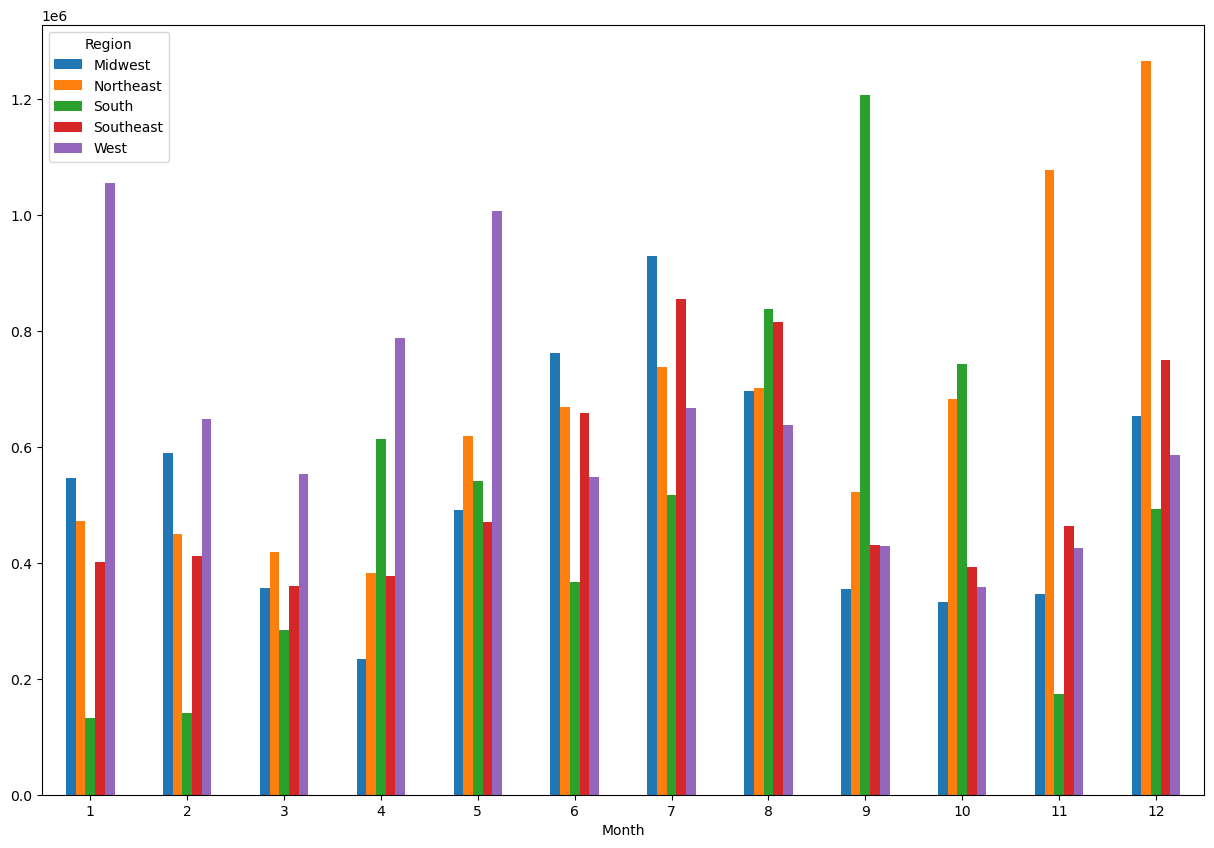

In [14]:
#  Import Street footwear & Temp CSVs
adidas_street_fw_by_month = "../Resources/street_footwear_csvs/adidas_street_footwear_by_month"
adidas_street_fw_by_month = pd.read_csv(adidas_street_fw_by_month)
adidas_street_fw_by_month = adidas_street_fw_by_month.groupby(["Region","Month"])["Total Sales"].sum().reset_index()
adidas_street_fw_by_month.pivot(index='Month', columns='Region', values='Total Sales').plot(kind='bar', figsize=(15, 10))
plt.xticks(rotation=0)
plt.show()


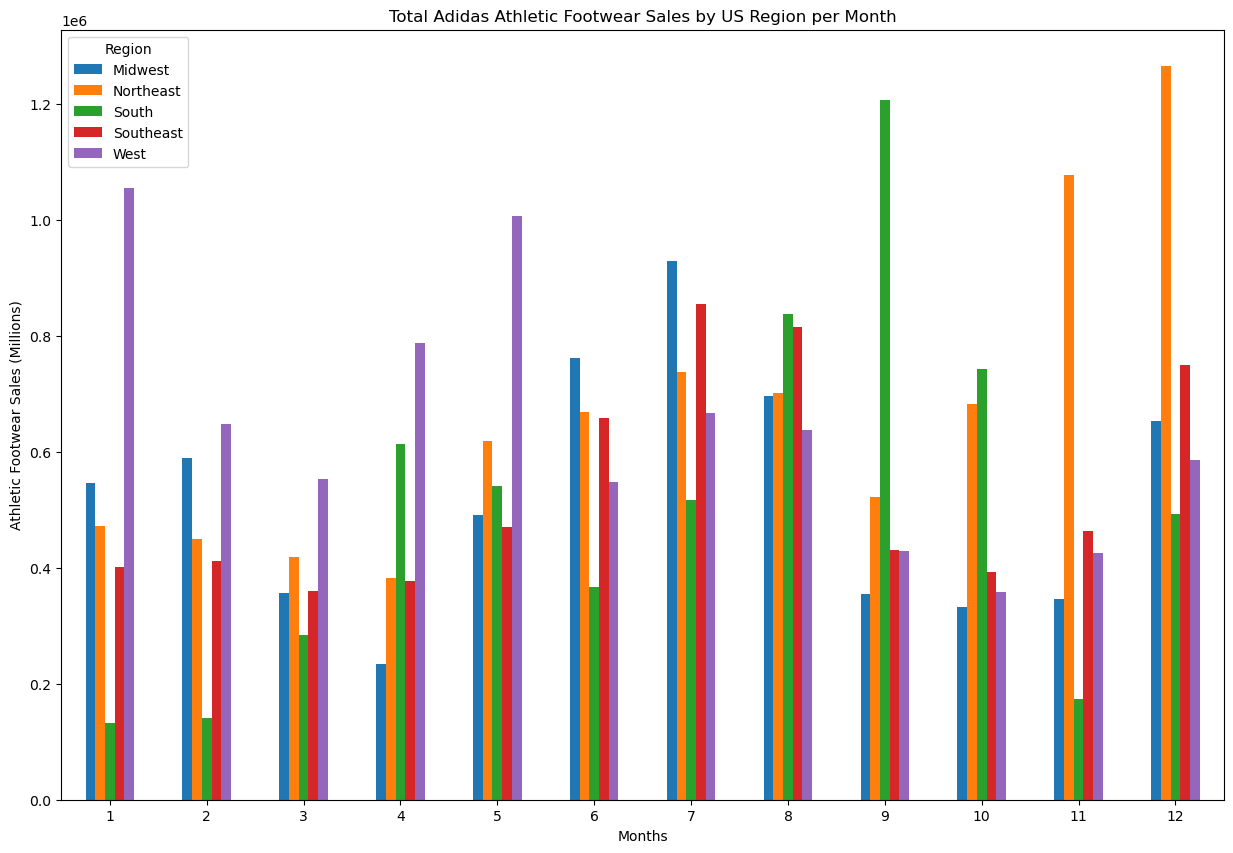

In [15]:
adidas_street_fw_by_month = adidas_street_fw_by_month.groupby(['Region', 'Month'])['Total Sales'].sum().reset_index()
adidas_street_fw_by_month.pivot(index='Month', columns='Region', values='Total Sales').plot(kind='bar', figsize=(15, 10))
plt.title('Total Adidas Athletic Footwear Sales by US Region per Month')
plt.xlabel('Months')
plt.ylabel('Athletic Footwear Sales (Millions)')
plt.xticks(rotation=0)
plt.show()

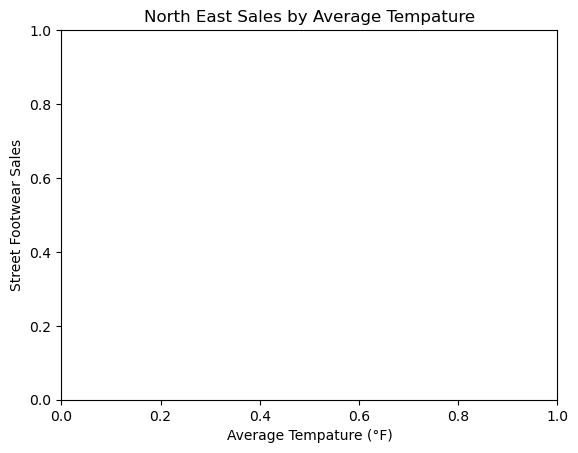

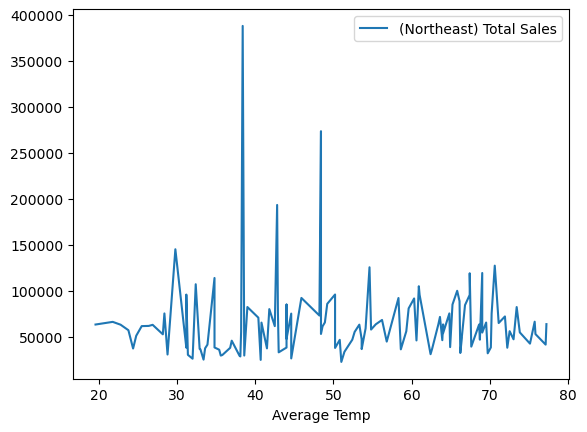

In [16]:
NE_street_fw_sales = "../Resources/street_footwear_csvs/ne_street_temp"
NE_street_fw_sales = pd.read_csv(NE_street_fw_sales)
NE_street_fw_sales = NE_street_fw_sales.set_index('Average Temp')
plt.title('North East Sales by Average Tempature')
plt.ylabel("Street Footwear Sales")
plt.xlabel('Average Tempature (°F)')
NE_street_fw_sales.plot()
plt.show()

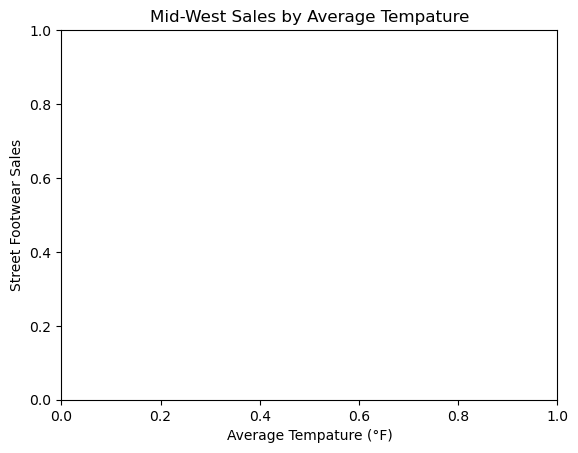

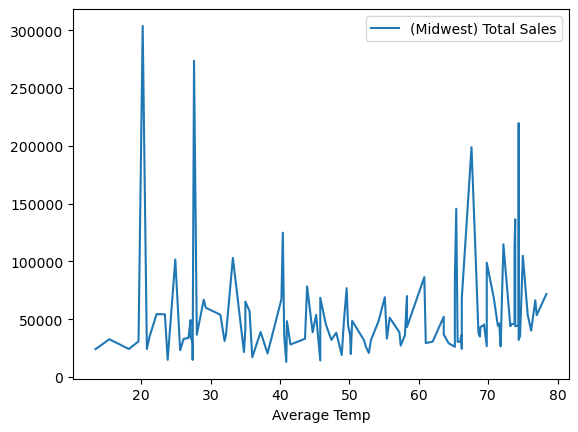

In [17]:
MW_street_fw_sales = "../Resources/street_footwear_csvs/mw_street_temp"
MW_street_fw_sales = pd.read_csv(MW_street_fw_sales)
MW_street_fw_sales = MW_street_fw_sales.set_index('Average Temp')
plt.title('Mid-West Sales by Average Tempature')
plt.ylabel("Street Footwear Sales")
plt.xlabel('Average Tempature (°F)')
MW_street_fw_sales.plot()
plt.show()

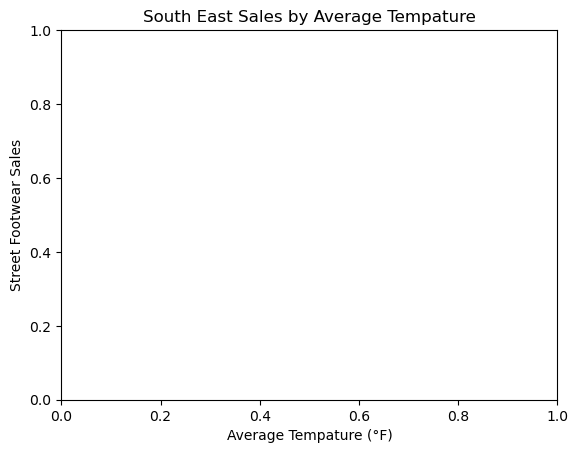

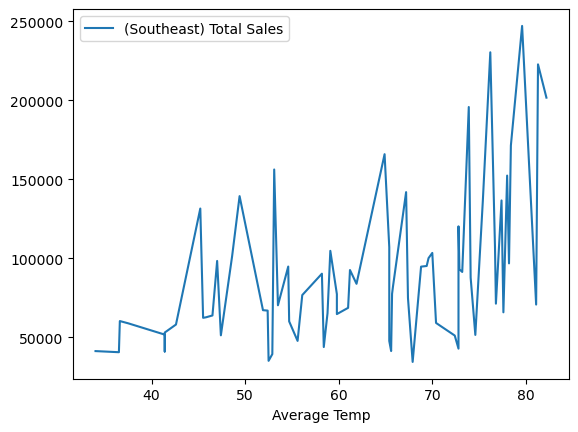

In [18]:
SE_street_fw_sales = "../Resources/street_footwear_csvs/se_street_temp"
SE_street_fw_sales = pd.read_csv(SE_street_fw_sales)
SE_street_fw_sales = SE_street_fw_sales.set_index('Average Temp')
plt.title('South East Sales by Average Tempature')
plt.ylabel("Street Footwear Sales")
plt.xlabel('Average Tempature (°F)')
SE_street_fw_sales.plot()
plt.show()

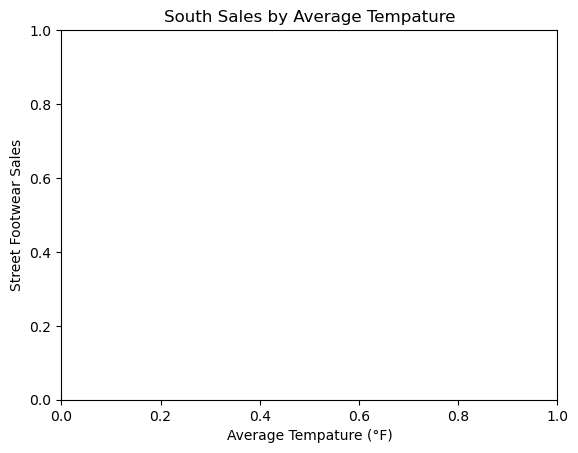

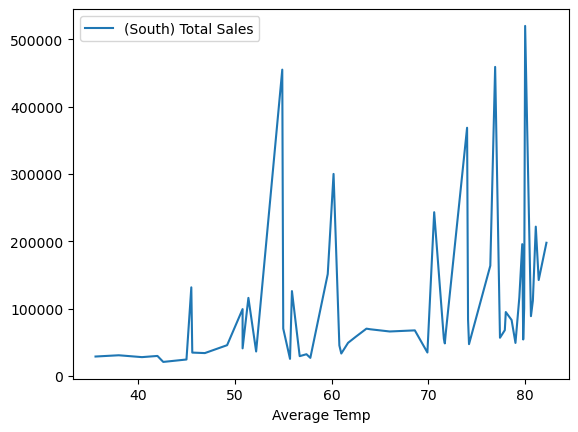

In [19]:
South_street_fw_sales = "../Resources/street_footwear_csvs/south_street_temp"
South_street_fw_sales = pd.read_csv(South_street_fw_sales)
South_street_fw_sales = South_street_fw_sales.set_index('Average Temp')
plt.title('South Sales by Average Tempature')
plt.ylabel("Street Footwear Sales")
plt.xlabel('Average Tempature (°F)')
South_street_fw_sales.plot()
plt.show()

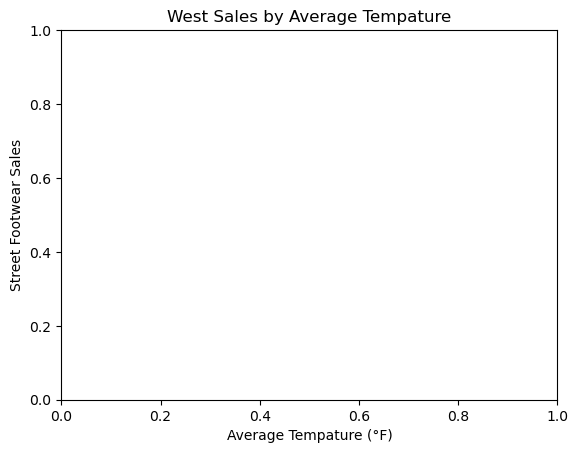

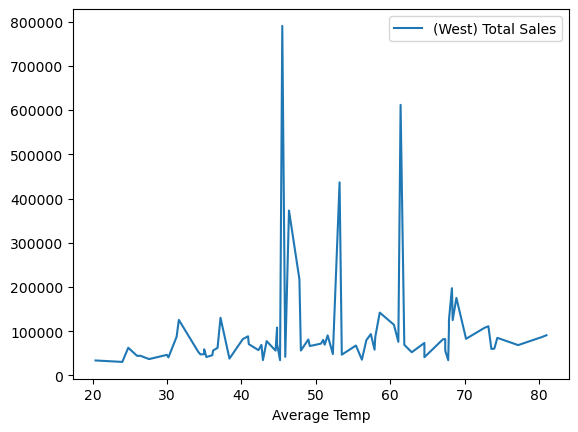

In [20]:
west_street_fw_sales = "../Resources/street_footwear_csvs/west_street_temp"
west_street_fw_sales = pd.read_csv(west_street_fw_sales)
west_street_fw_sales = west_street_fw_sales.set_index('Average Temp')
plt.title('West Sales by Average Tempature')
plt.ylabel("Street Footwear Sales")
plt.xlabel('Average Tempature (°F)')
west_street_fw_sales.plot()
plt.show()

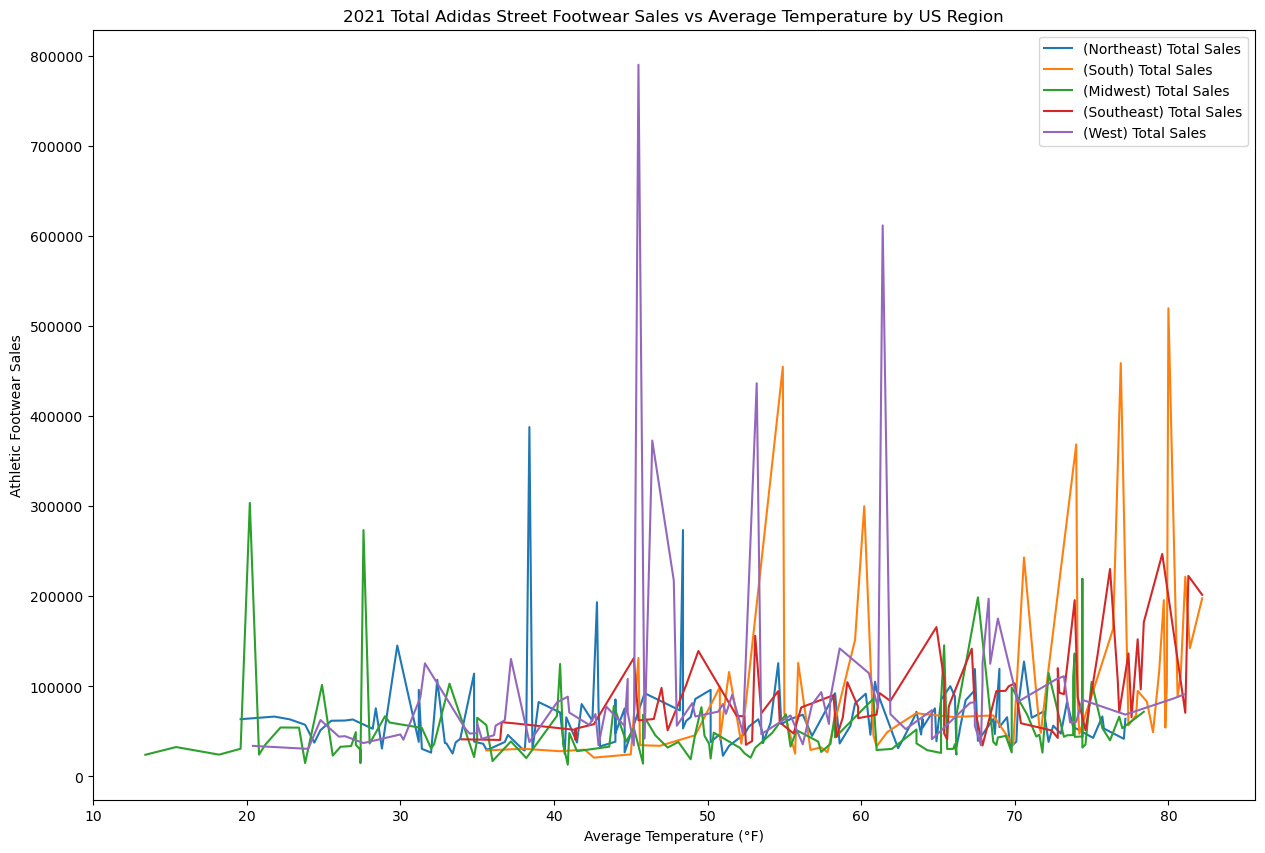

In [21]:
#plotting 2021 Total Adidas Athletic Footwear Sales vs Average Temperature by US Region
fig, ax = plt.subplots(figsize=(15, 10))

NE_street_fw_sales.plot(ax=ax)
South_street_fw_sales.plot(ax=ax)
MW_street_fw_sales.plot(ax=ax)
SE_street_fw_sales.plot(ax=ax)
west_street_fw_sales.plot(ax=ax)
plt.title('2021 Total Adidas Street Footwear Sales vs Average Temperature by US Region')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Athletic Footwear Sales')
plt.show()

In [22]:
#Clean Data if needed

In [23]:
#Extract Data for the scatter Plots

In [24]:
#Plotting Sales VS temp Data

In [25]:
#Create forecast models/formulas

In [26]:
#Plot Forecasting models

In [27]:
#Scatter Plot Sales & Temp Data

In [28]:
#Analyze data on forecasting and scatter plots- Is there cooreleation between tempature and adidas sales?